In [2]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
from skimage.measure import label, regionprops
from skimage.color import label2rgb
from skimage.io import imread
from skimage.filters import threshold_otsu
import os
import gdown
import shutil

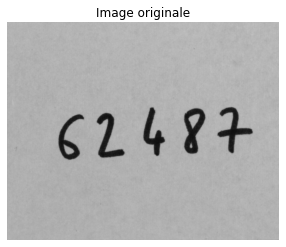

In [4]:
# Charger l'image en couleur
image = cv.imread('./code0 (2) (1) (3).tif')  # Remplace 'image.jpg' par le chemin de ton image
# Afficher l'image originale

plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
plt.title("Image originale")
plt.axis('off')
plt.show()

# Prétraitement

In [5]:
# Convertir l'image en niveaux de gris
image_gris = cv.cvtColor(image, cv.COLOR_BGR2GRAY)

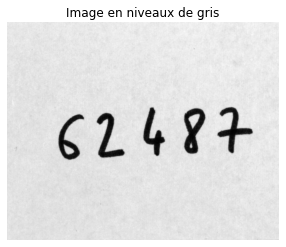

In [6]:
# Afficher l'image en niveaux de gris
plt.imshow(image_gris, cmap='gray')
plt.title("Image en niveaux de gris")
plt.axis('off')
plt.show()

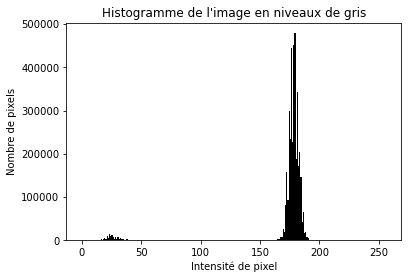

In [7]:
plt.hist(image.ravel(), bins=256, range=(0, 256), color='black')
plt.title("Histogramme de l'image en niveaux de gris")
plt.xlabel("Intensité de pixel")
plt.ylabel("Nombre de pixels")
plt.show()

"📊 L'histogramme montre que l'image est relativement claire, avec la plupart des pixels situés entre 150 et 200 🌤️. Quelques pixels noirs ⚫, entre 0 et 50, indiquent la présence de détails sombres, confirmant que l'image est globalement lumineuse avec certaines zones plus foncées. 🎯"



### Binarisation

In [8]:
# Les pixels au-dessus du seuil seront noirs (0), et ceux en dessous seront blancs (255).
_,binary_image = cv.threshold(image, 100, 255, cv.THRESH_BINARY_INV)

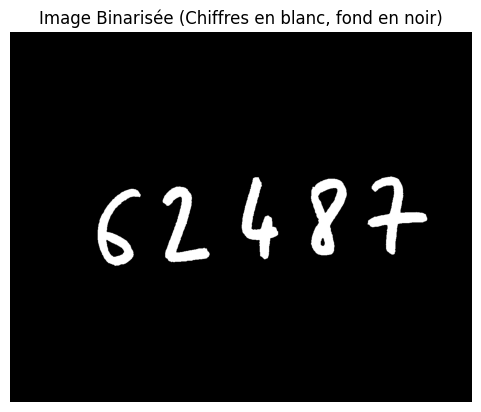

In [53]:
# Afficher l'image binarisée
plt.imshow(binary_image, cmap='gray')
plt.title("Image Binarisée (Chiffres en blanc, fond en noir)")
plt.axis('off')
plt.show()

# Traitement bas niveaux

In [9]:
# Convertir l'image en niveaux de gris avant l'analyse des composantes connexes
gray_image = cv.cvtColor(binary_image, cv.COLOR_BGR2GRAY)

# Analyse des composantes connexes
num_labels, labeled_image = cv.connectedComponents(gray_image)

print(f"Nombre de chiffres détectés : {num_labels - 1}")

# # Afficher l'image avec les composantes connexes colorées
# plt.imshow(gray_image)
# plt.title("Composantes connexes colorées")
# plt.axis('off')
# plt.show()

Nombre de chiffres détectés : 5


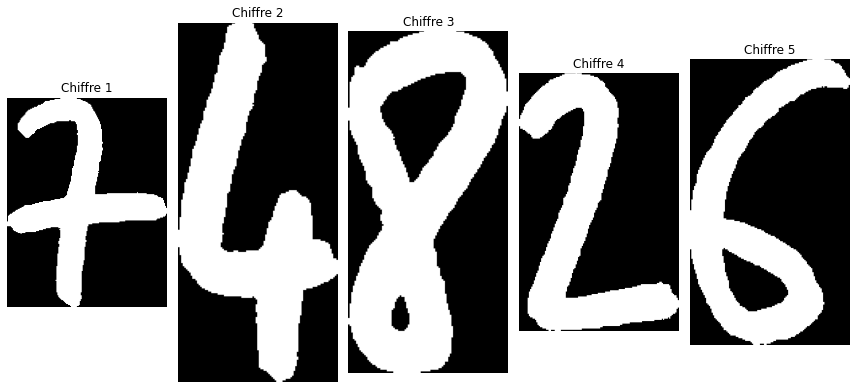

In [10]:
# Préparer une liste pour stocker les chiffres découpés
chiffres_decoupes = []

# Parcourir les labels (en ignorant le label 0 correspondant au fond)
for label in range(1, num_labels):
    # Masque pour la région actuelle
    region_mask = (labeled_image == label).astype(np.uint8) * 255

    # Détecter le rectangle englobant
    x, y, w, h = cv.boundingRect(region_mask)

    # Découper la région correspondant au chiffre
    chiffre = binary_image[y:y+h, x:x+w]
    chiffres_decoupes.append(chiffre)

    # Dessiner le rectangle sur une copie de l'image originale (facultatif)
    cv.rectangle(image, (x, y), (x+w, y+h), (127), 1)

# Afficher les chiffres découpés
plt.figure(figsize=(12, 8))
for i, chiffre in enumerate(chiffres_decoupes):
    plt.subplot(1, len(chiffres_decoupes), i+1)
    plt.imshow(chiffre, cmap='gray')
    plt.title(f'Chiffre {i+1}')
    plt.axis('off')

plt.tight_layout()
plt.show()


# Dilatation

(-0.5, 118.5, 212.5, -0.5)

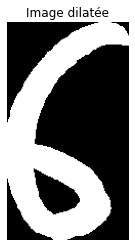

In [31]:

# Définir un élément structurant
kernel = cv.getStructuringElement(cv.MORPH_RECT, (5, 1))  # Ligne horizontale

# Appliquer la dilatation
dilated_image = cv.dilate(chiffres_decoupes[4], kernel, iterations=1)

plt.title("Image dilatée")
plt.imshow(dilated_image, cmap='gray')
plt.axis('off')


In [30]:
dilated_image

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)